# Overview

### About
This notebook accompanies the paper “Data-driven insights into reaction mechanism of Li-rich cathodes” by Jieun Kim, Injun Choi et al. In this tutorial, full access to the dataset and code is provided for verification.

Detailed information including full paper and supplementary information is available at:

https://pubs.rsc.org/en/content/articlelanding/2025/ee/d4ee05222f

## Table of Contents

Instructions for Reviewers
- Public access note
- Prerequisite Packages
- Package Description
- Dataset Access


Example notebook
- Setup and Prerequisites
- Dataset control (Figure 2b in the manuscript)
- Feature extraction with PCA (Figure 2c in the manuscript, Figure S4 in Supplementary Information)
- Physical interpretation of principal components (Figure 3 in the manuscript)
- Degaradation analysis (Figure 4 in the manuscript)
- Predictive modeling (Figure 5 in the manuscript)
- Data description (Figure 2a in the manuscript)



# Instructions for Researchers

## Public Access Note

This setup guide provides clear instructions for researchers to install the necessary packages, access the dataset, and understand the core contribution of our work. 

It also outlines the functions and availability of the data and code, to maintain transparency and promote future work in the research field.

Due to the above reasons, all works including code and datasets are available under the MIT License. Please treat the data and code accordingly.

## Prerequisite Packages
To ensure this notebook runs smoothly, please install the following Python packages. The pip commands provided below will install these packages if they are not already installed.

In [2]:
# Uncomment the line below to install all required packages if not already installed:
%pip install --upgrade numpy pandas matplotlib scikit-learn tqdm seaborn > null


Note: you may need to restart the kernel to use updated packages.


## Package Description

Ensure the following directory structure is present:

- **example_notebook.ipynb**: The main notebook file.

- **example_lib**: A subdirectory containing the custom Python scripts.

  - **ex_dataloader.py**: Handles the loading and preprocessing of datasets, including functions for reading data files and preparing them for analysis.

  - **ex_figure.py**: Contains functions to generate figures and visualizations used throughout the study, such as plotting graphs, visualizing PCA results, and displaying degradation trends.

  - **ex_load.py**: Responsible for data loading and initial processing steps like normalization and scaling.

  - **ex_model.py**: Defines the machine learning and predictive models used in the study, including the architecture and training routines.

  - **ex_pca.py**: Implements Principal Component Analysis (PCA) for feature extraction, including functions to compute and visualize principal components.

  - **ex_pred.py**: Focuses on predictive modeling, providing functions for model training, validation, and performance evaluation.

  - **ex_utility.py**: Provides utility functions that support the other scripts, including data transformations and other helper functions.

- **data**: A subdirectory where the dataset should be placed.

  - **dataset-1**: A subdirectory includes dataset for training.

  - **dataset-2**: A subdirectory includes dataset for validation.

## Dataset access

The full dataset required to run this notebook is available at the following link:

https://github.com/LRLO-PCA/Data-driven-insights-into-reaction-mechanism-of-Li-rich-cathodes

Please download the datasets and place them in the data subdirectory within the project directory as specified in the notebook instructions, if needed.

# Example Notebook for LRLO Cathode Analysis

Follow the cells sequentially to demonstrate the data processing steps, models application, and results interpretation.

## Setup and Prerequisites

In [1]:
# Uncomment the following line if any required package is not installed:
# %pip install --upgrade numpy pandas matplotlib scikit-learn tqdm seaborn

# Required Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


## Dataset control

### Data Loading

In [2]:
from example_lib.ex_load import pkl_load

In [3]:
## Load dataset for training

input_path = "./dataset"
input_name = "dataset-1"

data = pkl_load(input_path, input_name)

<pkl_load> File ./dataset\dataset-1.pkl is successfully loaded from ./dataset


### Data Visualizing (Figure 2b in manuscript)

In [4]:
from example_lib.ex_figure import plot_capacity_curve, all_charge_curve_fig
%matplotlib inline

<all_charge_curve_fig> 3861544d4f576f69516749336438386273552f6937795a4555554c7831493937715a5748593661466562513d, 9
<all_charge_curve_fig> 57386d312b4e4e656c6b59502f703834437058512b5a3144674a617064345a4a33304549694a526e65686f3d, 18


/Users/inchul/Downloads/code_and_notebook_0801/example_lib/ex_utility.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  now_dict[col][cycle_norm - 1] = np.delete(now_dict[col][cycle_norm - 1], zero_out)
/Users/inchul/Downloads/code_and_no

<all_charge_curve_fig> 5173445064497947323049326d784b626545722b5a49393843647779596e68707a3855616a43516d4c41553d, 12
<all_charge_curve_fig> 757a703935736c51476a3648515a6f385638754f736b5a76417369474e76456458736f6d6e4d6a656a32733d, 3
<all_charge_curve_fig> 3378597970774871594e32724c57344d716a6641494d5253757871334270776e676369424e7736432f4d453d, 8
<all_charge_curve_fig> 5739504b3142412f304b4e387130706867445248624e737954757a30795750435a535739574b68776177775461774134626543484377386d72647a6974506761, 3
<all_charge_curve_fig> 692b542f354875414456302b66792b73655645536e6b566b324963646c654c3255544a4f4876306757734e63504f4f6242616f33554e434f3565554379726636, 4
<all_charge_curve_fig> 5739504b3142412f304b4e38713070686744524862466b7a6970374c48763537684531564d616c46616b733d, 18
<all_charge_curve_fig> 4a4d436b6e6e705434596c517a6a69576749454e58394d52514c69664d6c443457676a47527878544572453d, 12
<all_charge_curve_fig> 597a6f634b7449496b33682b3851657075306c6379542f6431544d3968525979414a304b6249634e4b6d36455

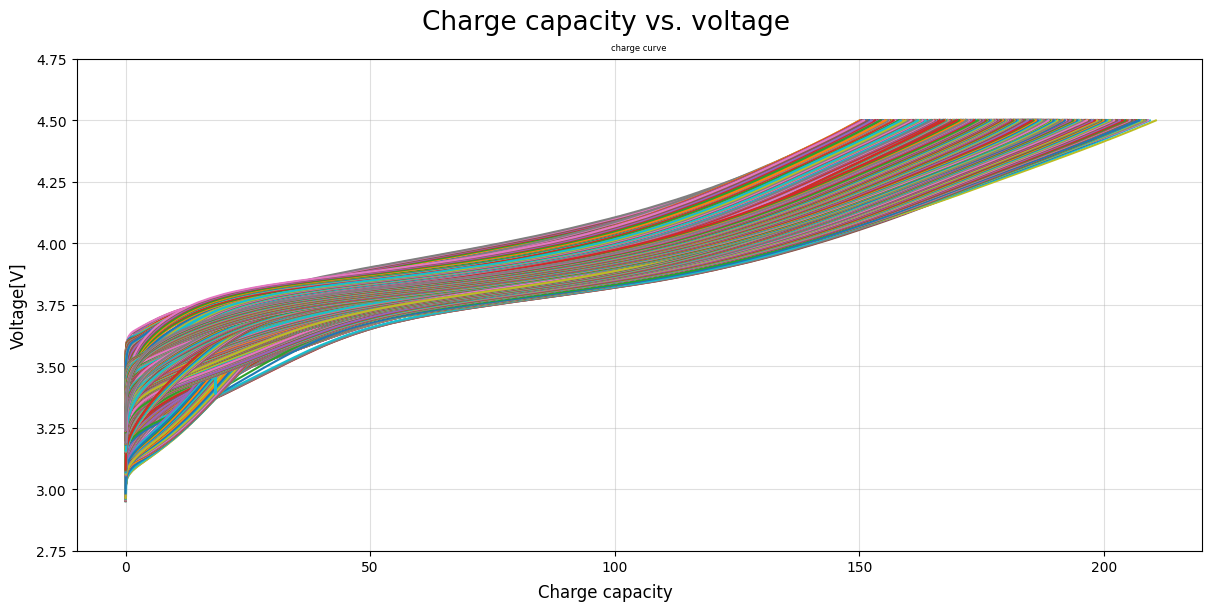

In [7]:
# Visualize all charge curves in all experiments(Figure 1b).

all_charge_curve_fig(data)

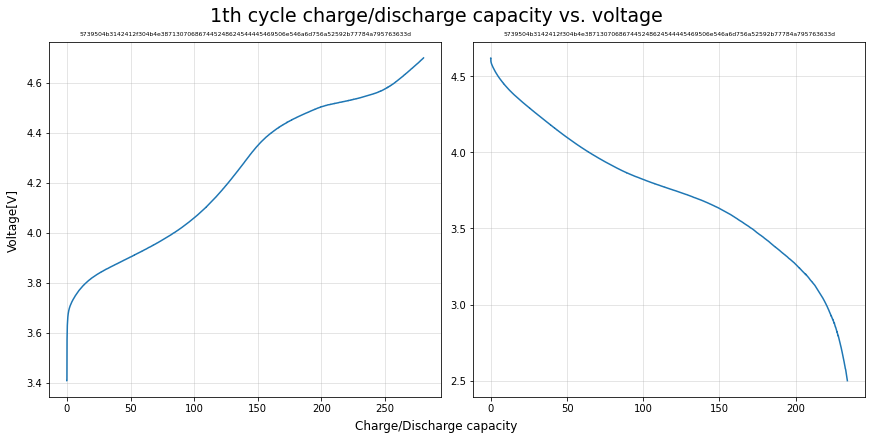

In [5]:
# Plot specific Charge/Discharge curve.
# Exp: 5739504b3142412f304b4e387130706867445248624544445469506e546a6d756a52592b77784a795763633d, Channel: 23, Cycle: 1

plot_capacity_curve(data, '5739504b3142412f304b4e387130706867445248624544445469506e546a6d756a52592b77784a795763633d', '23', 1)

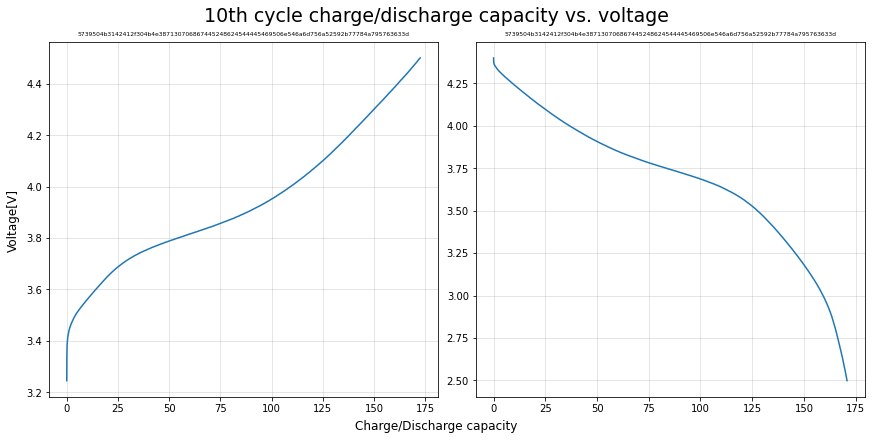

In [6]:
# Draw specific Charge/Discharge curve.
# Exp: 5739504b3142412f304b4e387130706867445248624544445469506e546a6d756a52592b77784a795763633d, Channel: 23, Cycle: 10

plot_capacity_curve(data, '5739504b3142412f304b4e387130706867445248624544445469506e546a6d756a52592b77784a795763633d', '23', 10)

## Feature Extraction with PCA

In [7]:
from example_lib.ex_utility import get_curvedata
from example_lib.ex_pca import do_pca, get_pca, plot_comp_vs_comp, comp_vs_cap, correlation

In [8]:
# Preprocess the train dataset including interpolation.

interp_period = 10000
dataset, exp_info, ch_info, cy_info, avv_info, bat_info = get_curvedata(data, interp_period=interp_period)

100%|██████████| 33/33 [45:35<00:00, 82.90s/it] 


In [9]:
# Generate PCA Components from train dataset.

n_comp = 7
comp_weight, comp, pca_model = get_pca(dataset, n_comp)

<get_pca> PCA model: [('PCA', PCA(n_components=7, random_state=42))]
<get_pca> W: (15928, 7), H: (7, 10000)


### Visualizing PCA Results

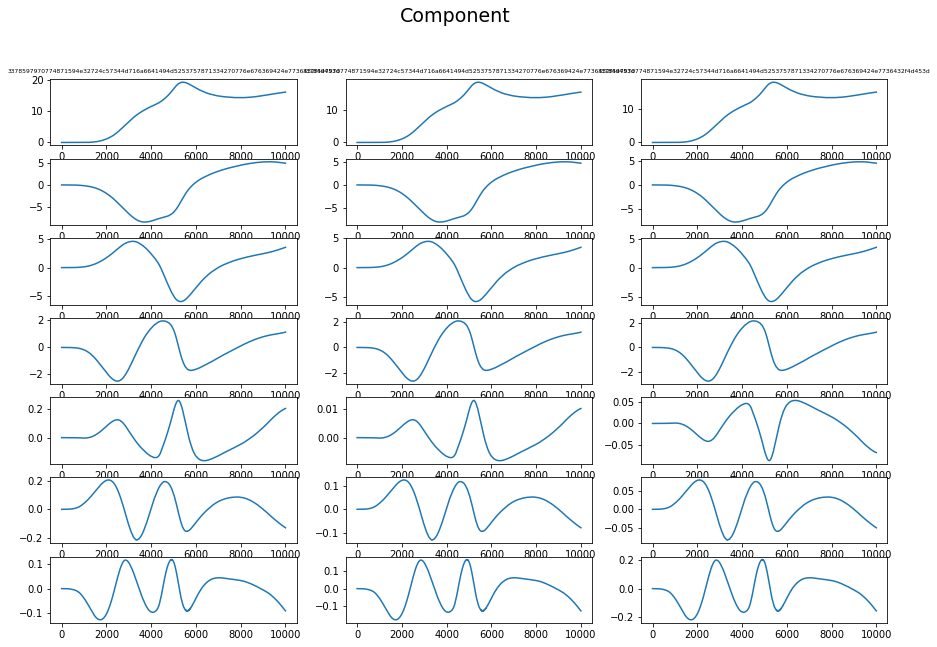

In [10]:
# Visualize Components for each charge curve(Figure 2c).
# Note that signs of the components can be inversed because of the characteristics of the PCA method.

mode = "comp_shape"

do_pca(dataset, comp_weight, comp, pca_model, n_comp, mode, exp_info, interp_period)

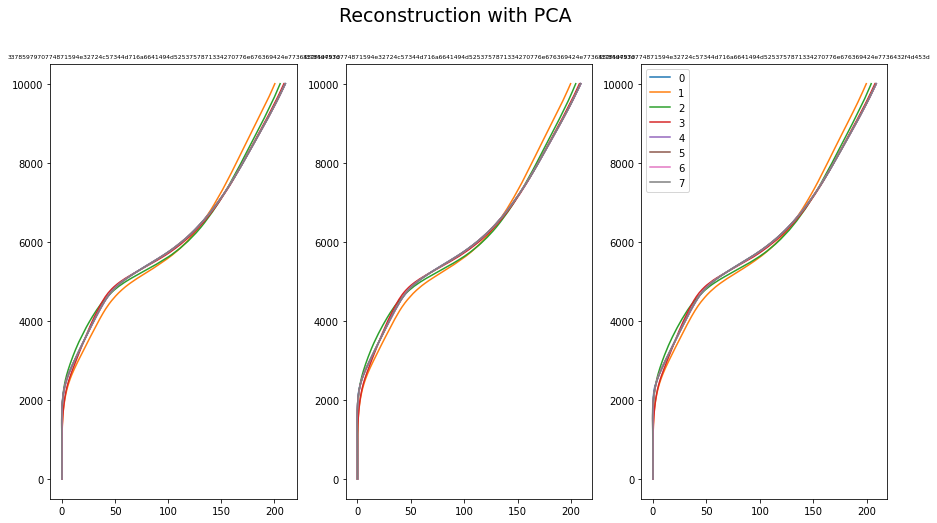

In [8]:
# Visualize reconstructed charge curve from [1, k] components(Figure S4).
# Ex, curve 4(purple curve) was reconstructed from component 1~4.
# Note that curve 0(blue curve) is original charge curve.

mode = "recon_cumul_comp"

do_pca(dataset, comp_weight, comp, pca_model, n_comp, mode, exp_info, interp_period)

## Physical interpretation of principal components

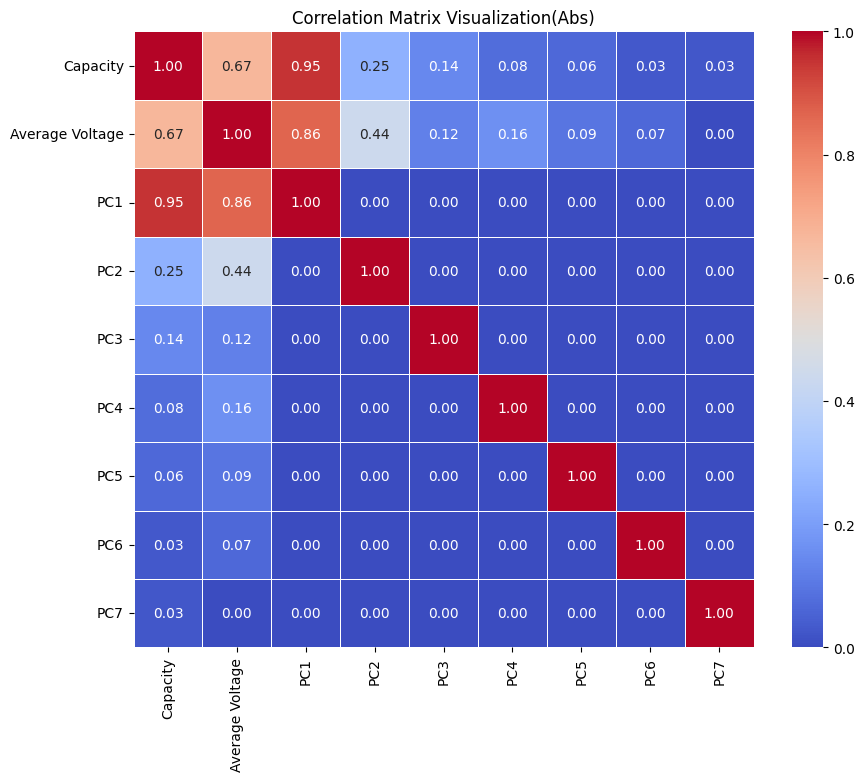

In [15]:
# Draw Absolute Correlation among main features(Figure 3a).
# Features: Capacity, Average Voltage, PCA Component 1 ~ 7.

correlation(comp_weight, dataset[:, -1], avv_info)

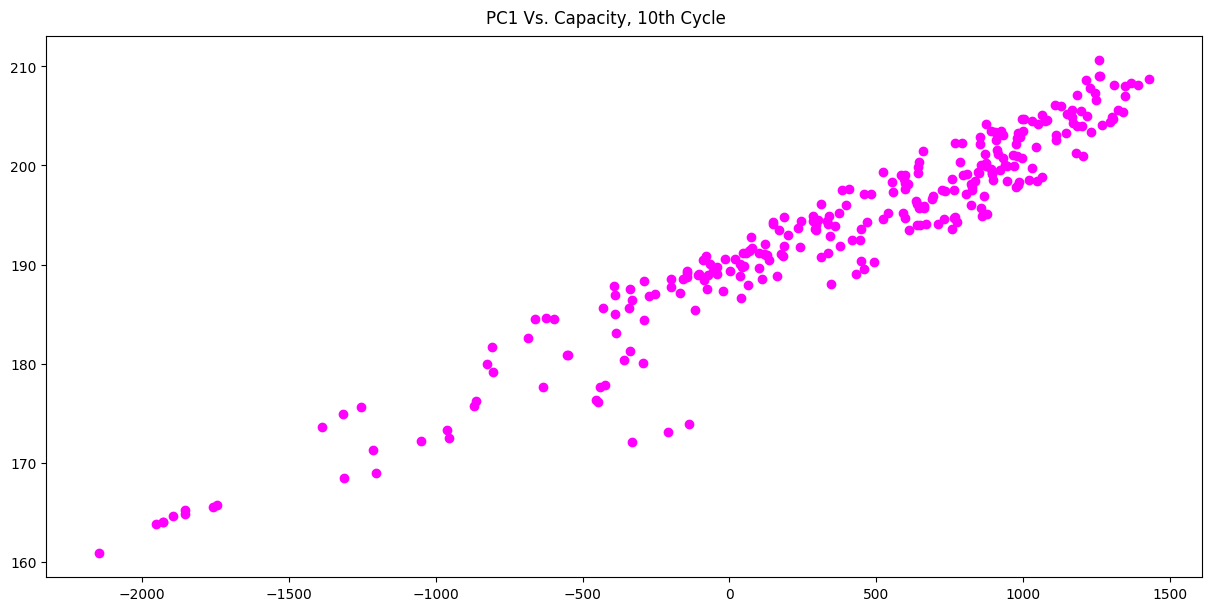

In [16]:
# Draw Component 1 vs. Capacity for 10th Cycle(Figure 3b).

comp_vs_cap(comp_weight, cy_info, dataset[:, -1], 10)

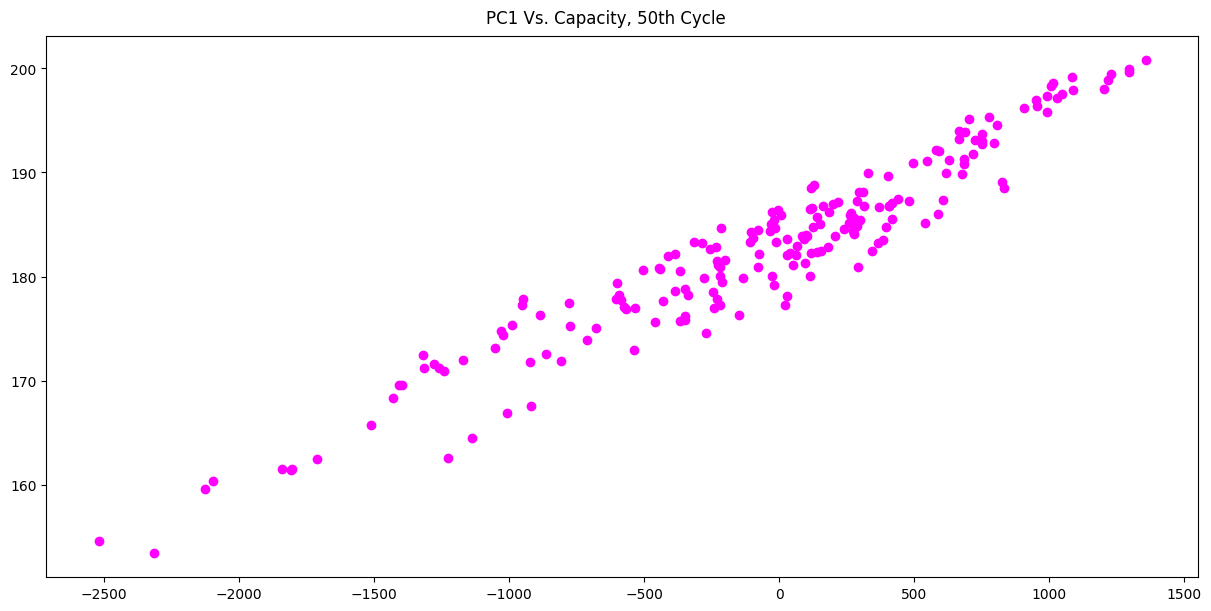

In [17]:
# Draw Component 1 vs. Capacity for 50th Cycle(Figure 3c).

comp_vs_cap(comp_weight, cy_info, dataset[:, -1], 50)

## Degradation analysis

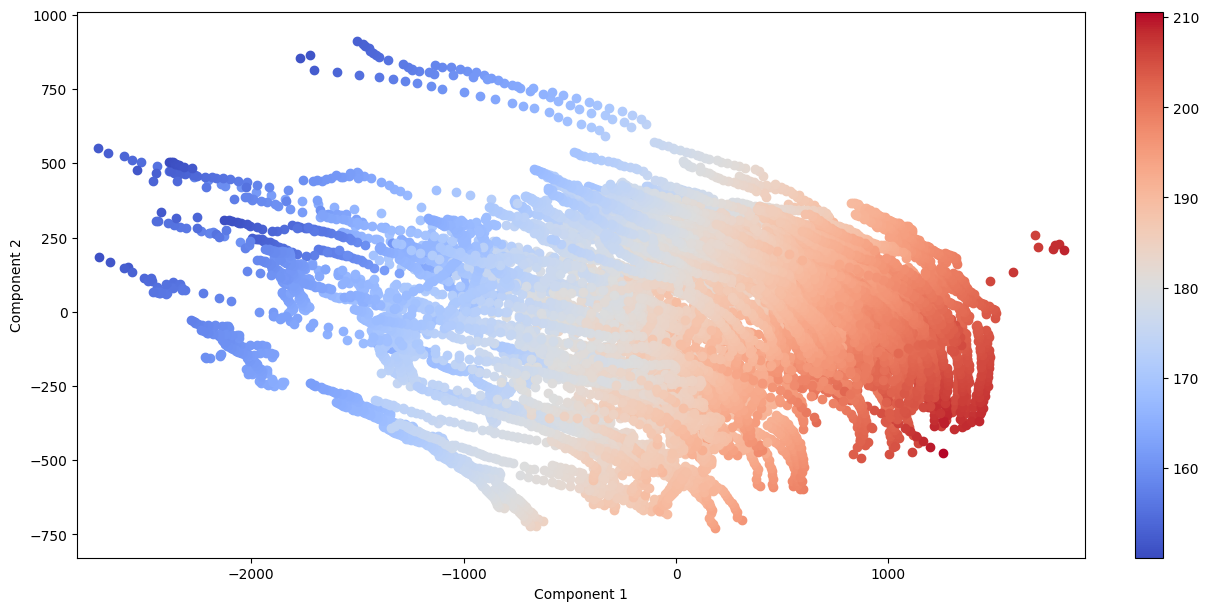

In [18]:
# Plot Weight of Component 1 vs. Component 2 w.r.t. charge capacity for each charge curve(Figure 3a).
# Note that signs of the components can be inversed because of the characteristics of the PCA method.

plot_comp_vs_comp(comp_weight, exp_info, cy_info, dataset[:, -1], 0, 1, cycle=1, origin=0)

In [19]:
# Specific experiment and channel corresponding to Figure 3b

idx = np.where((exp_info == "4a4d436b6e6e705434596c517a6a69576749454e58394d52514c69664d6c443457676a47527878544572453d") & (ch_info == "65"))

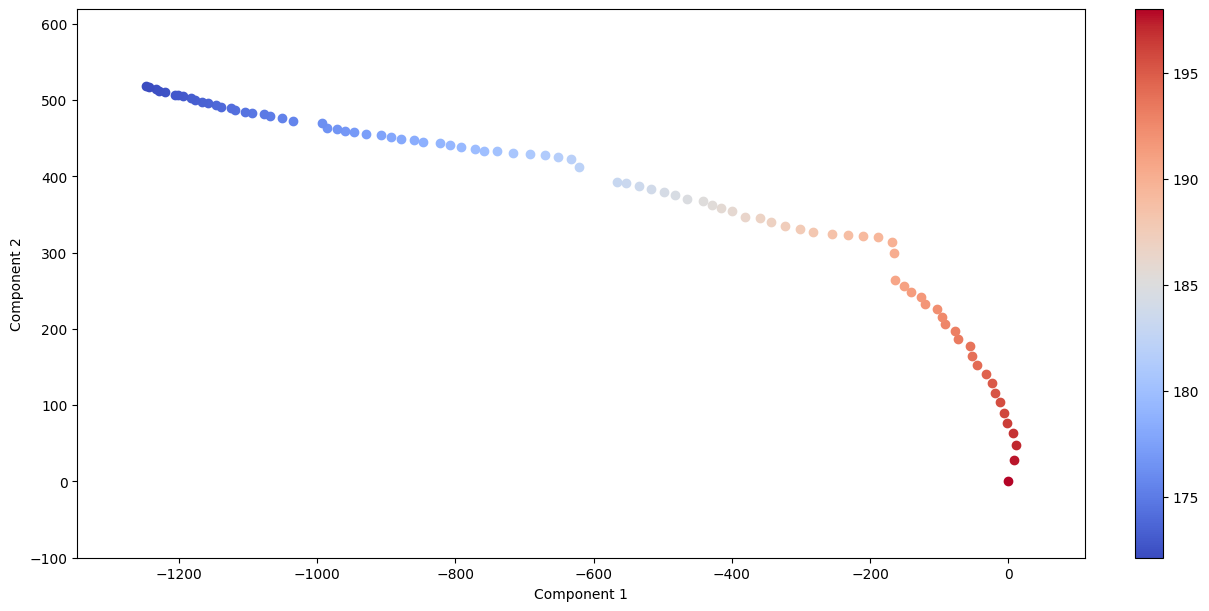

In [20]:
# Draw Weights of Component 1 vs. Component 2 for each charge curve in specific experiment and channel(Figure 3b)

plot_comp_vs_comp(np.squeeze(comp_weight[idx, :], axis=0), exp_info[idx], cy_info[idx], np.squeeze(dataset[idx, -1], axis=0), 0, 1, cycle=1, origin=1)

## Predictive Modeling

### Data and model setup

In [21]:
from example_lib.ex_dataloader import DataLoader
from example_lib.ex_model import Model
from example_lib.ex_pred import predict, get_triangle
from example_lib.ex_figure import plot_comp_with_target_cycle

In [ ]:
# Load validation dataset.

input_path = "./dataset"
input_name = "dataset-2"

val_data = pkl_load(input_path, input_name)

<load_all> Now 5a6233646d586f5179782f64706543332b43312b517778727353707856564d737537664832674c7239476b5970424168376d346e676767486c35595954655559...
<load_all> Now 45474947545a4e7073624b2f6c4c2b6e33424f71565a5555587052353750677050394e41473044584d42553d...
<load_all> Now 55517342524e6171643447514b51684c48754c6e456750566b454e4731304353535a4a30676a43774657413d...
<load_all> Now 57386d312b4e4e656c6b59502f703834437058512b5243414a324b396f692b77476a72567464694e65796b384671324e72382b5838316e744b76484c542b6748...
<load_all> Now 6276485370686b32766c61484168444c376a344e6e6550417355396f334d587058655364675457632f63733d...
<load_all> Now 6d52374b6e544f2b6154356453444f3077363363466f64396379316b36466c58395258734a4e65533051733d...
<load_all> Experiment: 6 Channel: 63 Cycle: 6030


In [23]:
channel_wise = 0
channel_mode = 1
seed = 42

In [24]:
# Set the dataloader.

dataloader = DataLoader(data, val_data)
dataloader.dl_ready(channel_wise=channel_wise, channel_mode=channel_mode, interp_period=interp_period, seed=seed)

<DataLoader> init finished
<dl_ready> dl_ready begins


100%|██████████| 6/6 [00:08<00:00,  1.40s/it]

<dl_ready> raw_to_np done
<split_data> train_shape: (15928, 10000), (15928, 10000)
<split_data> val_shape: (3999, 10000), (3999, 10000)
<dl_ready> split_data done


In [25]:
# Define and initialize the model.

pred_model = Model(dataloader)

In [26]:
# Set the train parameters.
# train_st_pnt: train beginning point(1 ~ 10000), train_st_pct: train data length(1 ~ 100%)
# Ex, set the train_st_pnt as 2000(20% of the original charge curve) and train_st_pct as 40(40% of the orginal charge curve)
# Thus, in this setting the model trains with [20%, 60%] of the charge curve.

train_st_pnt = 2000
train_st_pct = 40
mx_sample = len(dataloader.x_val)

In [27]:
# Train the model.

_, _, pred_weight = predict(pred_model, comp, pca_model, train_st_pnt, train_st_pct, mx_sample=mx_sample, verbose=1)

<operate> 2000, 40; model train/valid begins...
<operate> 0.0 / 100% Done...
<operate> 0.5001250312578145 / 100% Done...
<operate> 1.000250062515629 / 100% Done...
<operate> 1.5003750937734435 / 100% Done...
<operate> 2.000500125031258 / 100% Done...
<operate> 2.5006251562890722 / 100% Done...
<operate> 3.000750187546887 / 100% Done...
<operate> 3.500875218804701 / 100% Done...
<operate> 4.001000250062516 / 100% Done...
<operate> 4.50112528132033 / 100% Done...
<operate> 5.0012503125781445 / 100% Done...
<operate> 5.501375343835959 / 100% Done...
<operate> 6.001500375093774 / 100% Done...
<operate> 6.501625406351588 / 100% Done...
<operate> 7.001750437609402 / 100% Done...
<operate> 7.501875468867217 / 100% Done...
<operate> 8.002000500125032 / 100% Done...
<operate> 8.502125531382847 / 100% Done...
<operate> 9.00225056264066 / 100% Done...
<operate> 9.502375593898474 / 100% Done...
<operate> 10.002500625156289 / 100% Done...
<operate> 10.502625656414104 / 100% Done...
<operate> 11.002

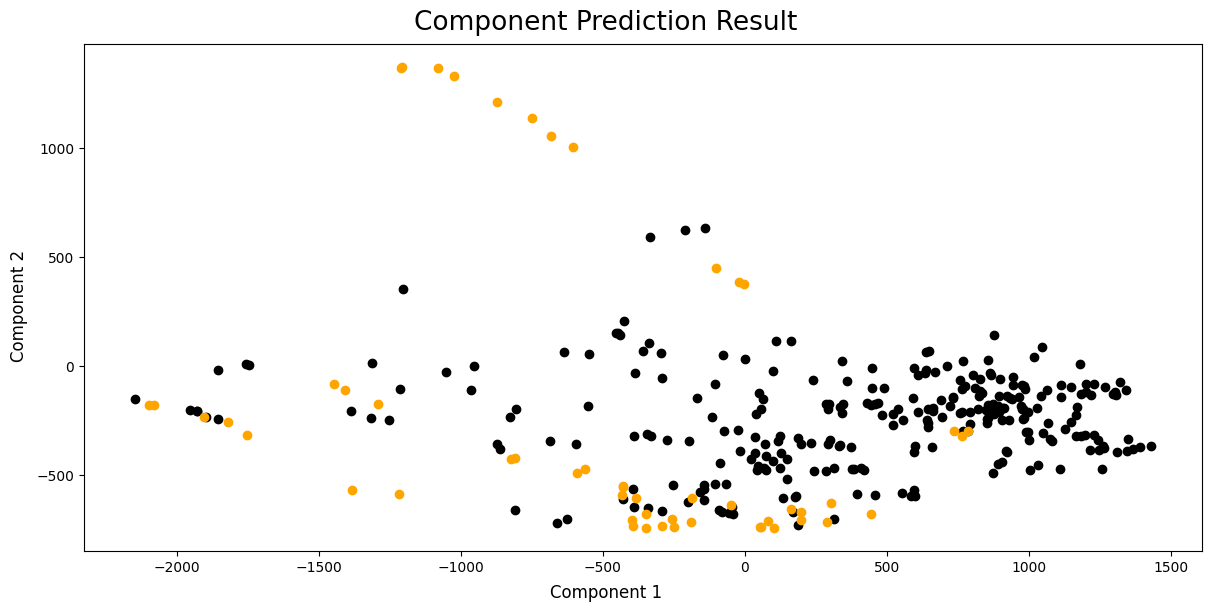

In [35]:
# Draw weights of PCA Component 1 vs. Component 2(Figure 5d) w.r.t 10th Cycle.
# Original(train) charge curves' point as black points, and reconstructed(validation) charge curve's point as yellow points.

target_cycle = [10]

plot_comp_with_target_cycle(comp_weight, pred_model.dl.train_cy, pred_weight, pred_model.dl.valid_cy, 0, 1, target_cycle)

### Prediction

In [ ]:
x_interval = 200
x_max = interp_period
y_interval = 2
y_max = 100
num_sample = mx_sample
gen_method = "cubic"
fail_thres = 100

<operate> 1, 1; model train/valid begins...
<operate> 1, 3; model train/valid begins...
<operate> 1, 5; model train/valid begins...
<operate> 1, 7; model train/valid begins...
<operate> 1, 9; model train/valid begins...
<operate> 1, 11; model train/valid begins...
<operate> 1, 13; model train/valid begins...
<operate> 1, 15; model train/valid begins...
<operate> 1, 17; model train/valid begins...
<operate> 1, 19; model train/valid begins...
<operate> 1, 21; model train/valid begins...
<operate> 1, 23; model train/valid begins...
<operate> 1, 25; model train/valid begins...
<operate> 1, 27; model train/valid begins...
<operate> 1, 29; model train/valid begins...
<operate> 1, 31; model train/valid begins...
<operate> 1, 33; model train/valid begins...
<operate> 1, 35; model train/valid begins...
<operate> 1, 37; model train/valid begins...
<operate> 1, 39; model train/valid begins...
<operate> 1, 41; model train/valid begins...
<operate> 1, 43; model train/valid begins...
<operate> 1, 45

/Users/inchul/miniforge3/envs/pymatgen_env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


<operate> 2601, 47; model train/valid begins...


/Users/inchul/miniforge3/envs/pymatgen_env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/inchul/miniforge3/envs/pymatgen_env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/inchul/miniforge3/envs/pymatgen_env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/inchul/miniforge3/envs/pymatgen_env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs

<operate> 2601, 49; model train/valid begins...
<operate> 2601, 51; model train/valid begins...
<operate> 2601, 53; model train/valid begins...
<operate> 2601, 55; model train/valid begins...
<operate> 2601, 57; model train/valid begins...
<operate> 2601, 59; model train/valid begins...
<operate> 2601, 61; model train/valid begins...
<operate> 2601, 63; model train/valid begins...
<operate> 2601, 65; model train/valid begins...
<operate> 2601, 67; model train/valid begins...
<operate> 2601, 69; model train/valid begins...
<operate> 2601, 71; model train/valid begins...
<operate> 2601, 73; model train/valid begins...
<get_train_idx> Beyond the valid length; Skip this point.
<operate> 2801, 1; model train/valid begins...
<operate> 2801, 3; model train/valid begins...
<operate> 2801, 5; model train/valid begins...
<operate> 2801, 7; model train/valid begins...
<operate> 2801, 9; model train/valid begins...
<operate> 2801, 11; model train/valid begins...
<operate> 2801, 13; model train/val

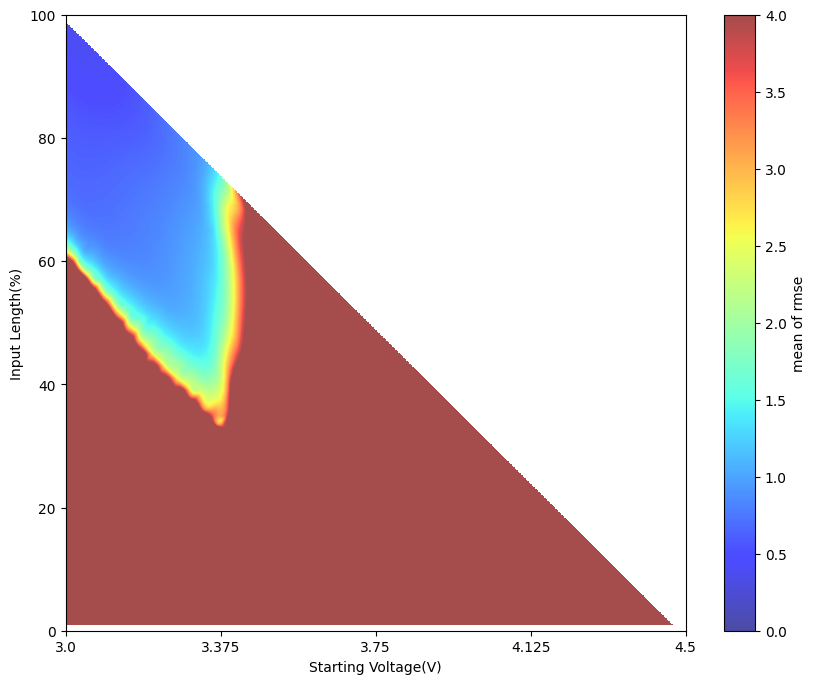

In [ ]:
# Draw a Average Prediction error (Figure 5b).
# Caution: This cell Requires a lot of throughput time. You can generate roughly with below cells (Prediction Demo)
# More than 1 day needed
# Note that we clamped RMSE to 100 when it's over 100.


res_df = get_triangle(dataloader, comp, pca_model, x_max, x_interval, y_max, y_interval, num_sample, gen_method, interp_period)

#### **cf. Prediction Demo**


In [28]:
x_interval = 2400
x_max = interp_period
y_interval = 14
y_max = 100
num_sample = 100
gen_method = "cubic"
fail_thres = 100

<operate> 1, 1; model train/valid begins...
<operate> 1, 15; model train/valid begins...
<operate> 1, 29; model train/valid begins...
<operate> 1, 43; model train/valid begins...
<operate> 1, 57; model train/valid begins...
<operate> 1, 71; model train/valid begins...
<operate> 1, 85; model train/valid begins...
<operate> 1, 99; model train/valid begins...
<operate> 2401, 1; model train/valid begins...
<operate> 2401, 15; model train/valid begins...
<operate> 2401, 29; model train/valid begins...
<operate> 2401, 43; model train/valid begins...
<operate> 2401, 57; model train/valid begins...
<operate> 2401, 71; model train/valid begins...
<get_train_idx> Beyond the valid length; Skip this point.
<operate> 4801, 1; model train/valid begins...
<operate> 4801, 15; model train/valid begins...
<operate> 4801, 29; model train/valid begins...
<operate> 4801, 43; model train/valid begins...
<get_train_idx> Beyond the valid length; Skip this point.
<operate> 7201, 1; model train/valid begins...


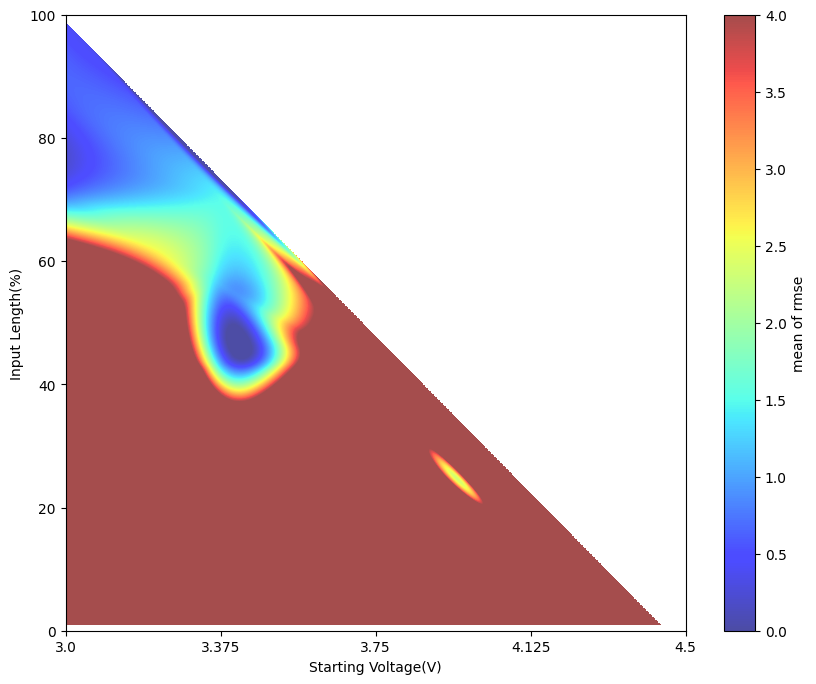

In [29]:
# Around 1 minutes needed. Note that each model is not validated by full validation set
# Visual Result may seem wrong due to the cubic interpolation
# Note that we clamped RMSE to 100 when it's over 100.

res_df = get_triangle(dataloader, comp, pca_model, x_max, x_interval, y_max, y_interval, num_sample, gen_method, interp_period, fail_thres)

### Prediction Results

In [30]:
res_df

,st_pos,inp_len,rmse
0,1,1,100
0,1,15,100
0,1,29,100
0,1,43,53.466667
0,1,57,12.500785
0,1,71,0.70427
0,1,85,0.564681
0,1,99,0.395776
0,2401,1,37.814499
0,2401,15,36.596092


## Data description

In [31]:
from example_lib.ex_figure import cycle_characteristic

In [32]:
# Combine train and validation dataset.

all_data = dict(data, **val_data)

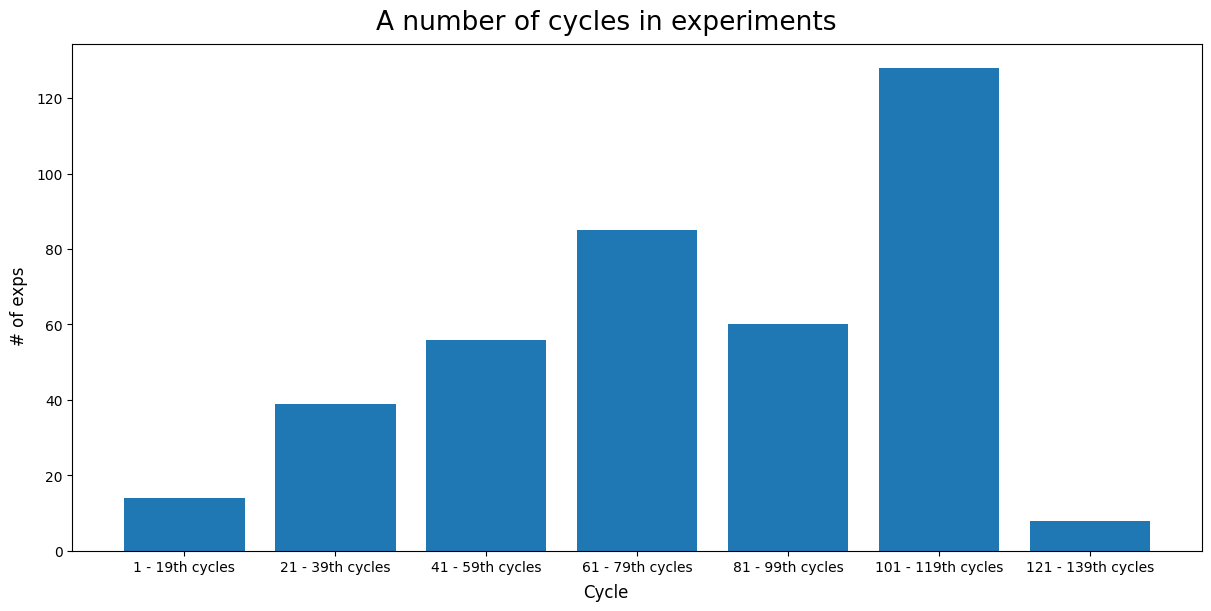

In [33]:
# Draw a number of cycles in all experiments. (Figure 2a)

cycle_characteristic(all_data, cumul=0)

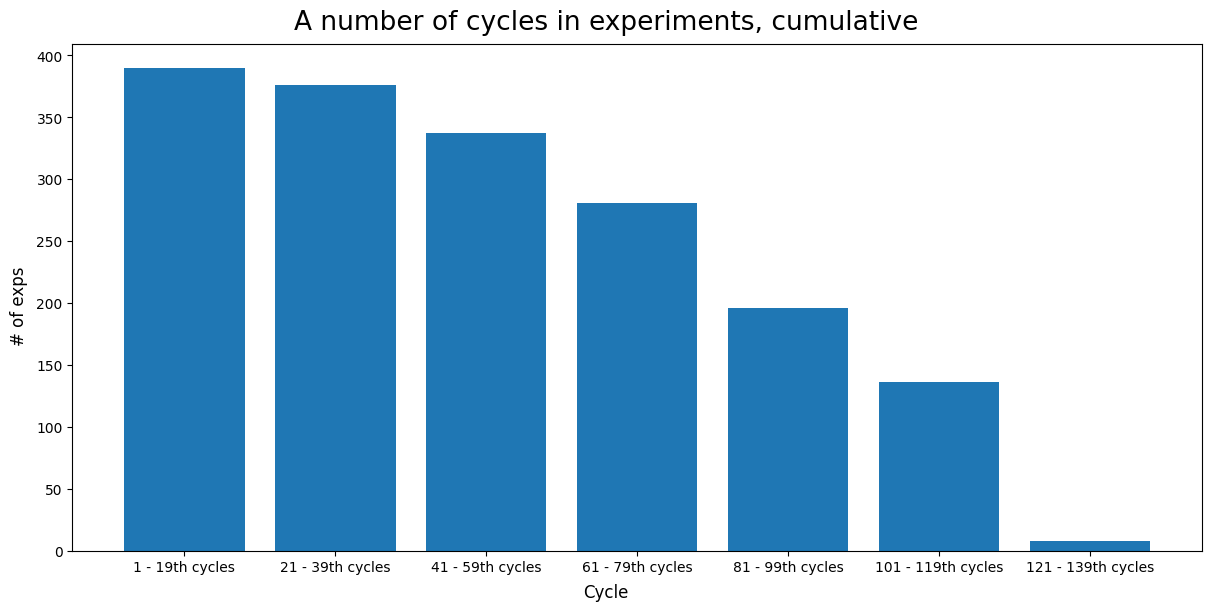

In [34]:
# Draw a number of cycles in all experiments(Cumulative).

cycle_characteristic(all_data, cumul=1)